In [22]:
from lib import classification as c
import joblib

import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn import cross_validation                                        
from sklearn import svm   
from sklearn import metrics
from sklearn import ensemble
from sklearn import cross_validation                                           
from sklearn import svm          
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_data = c.getTrainData(True) #Pass True to this function to re-train!

started extracting feautes
done extracting features


In [3]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    train_data[0], train_data[1], test_size=0.2, random_state=0)

weights = c.getClassWeights()

Counter({0: 109, 4: 105, 2: 101, 1: 100, 3: 96})


## Linear SVM

In [4]:
clf = LinearSVC(class_weight=weights)
clf.fit(X_train, y_train)

#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                            
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        25
          3       1.00      1.00      1.00        18
          4       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00       103

5 Fold CrossValidation Score 

[ 0.99038462  0.98039216  0.98039216  0.99019608  0.99009901]
Mean 0.986292803488


In [5]:
#With Final Test Data
#clf = LinearSVC()
#clf.fit(X_train, y_train)
#report, df = c.predict(clf,True)
#print report

## Logistic

In [6]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(class_weight=weights)

In [7]:
clf.fit(X_train, y_train)
#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                       
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        22
          1       0.93      1.00      0.97        14
          2       1.00      0.96      0.98        25
          3       1.00      0.94      0.97        18
          4       1.00      1.00      1.00        24

avg / total       0.98      0.98      0.98       103

5 Fold CrossValidation Score 

[ 0.99038462  0.97058824  0.98039216  0.98039216  0.99009901]
Mean 0.982371234861


### Random Forest

In [8]:
# Estimate the score on the entire dataset, with no missing valules
clf = ensemble.RandomForestClassifier(random_state=0, n_estimators=100)

In [9]:
clf.fit(X_train, y_train)

#Perform classification on train test split
y_pred = clf.predict(X_test)

In [10]:
#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)
#Perform 5 fold crossval
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        22
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        25
          3       1.00      0.94      0.97        18
          4       1.00      1.00      1.00        24

avg / total       0.99      0.99      0.99       103

5 Fold CrossValidation Score 

[ 0.98076923  0.99019608  0.98039216  0.98039216  0.99009901]
Mean 0.984369726565


In [19]:
X = np.array(X_train)

In [20]:
X.shape

(408, 400)

Feature ranking:
1. feature 102 (0.034869)
2. feature 117 (0.029382)
3. feature 122 (0.026526)
4. feature 338 (0.020515)
5. feature 333 (0.016231)
6. feature 186 (0.016184)
7. feature 118 (0.015984)
8. feature 12 (0.015560)
9. feature 390 (0.014969)
10. feature 359 (0.014702)
11. feature 226 (0.014306)
12. feature 15 (0.014123)
13. feature 20 (0.013962)
14. feature 27 (0.013465)
15. feature 254 (0.012870)
16. feature 73 (0.012424)
17. feature 284 (0.012086)
18. feature 217 (0.012042)
19. feature 157 (0.011860)
20. feature 43 (0.011721)
21. feature 231 (0.011080)
22. feature 399 (0.010991)
23. feature 108 (0.010849)
24. feature 334 (0.010635)
25. feature 198 (0.010342)
26. feature 98 (0.009999)
27. feature 190 (0.008743)
28. feature 245 (0.008712)
29. feature 214 (0.008585)
30. feature 128 (0.008406)
31. feature 268 (0.008219)
32. feature 33 (0.008215)
33. feature 182 (0.007769)
34. feature 75 (0.007524)
35. feature 110 (0.007412)
36. feature 40 (0.007104)
37. feature 240 (0.007013)
38.

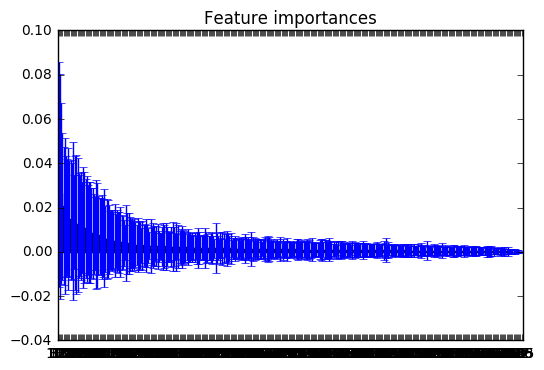

In [23]:
forest = clf
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### SVM RBF

In [33]:
clf = svm.NuSVC(kernel="rbf")

In [34]:
clf.fit(X_train, y_train)

#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                           
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      0.93      0.96        14
          2       1.00      1.00      1.00        25
          3       0.95      1.00      0.97        18
          4       1.00      1.00      1.00        24

avg / total       0.99      0.99      0.99       103

5 Fold CrossValidation Score 

[ 0.98076923  0.98039216  0.92156863  0.97058824  0.98019802]
Mean 0.966703254036


### Detect Outliers
Inliers are labeled 1, while outliers are labeled -1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [36]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [28]:
y_pred_outliers = clf.predict(X_outliers)

NameError: name 'X_outliers' is not defined

In [29]:
from collections import Counter                                             
t = Counter(y_pred_test)   
tr = Counter(y_pred_train)  
print t
print tr

Counter({1.0: 291, -1.0: 31})
Counter({1.0: 675, -1.0: 75})


In [30]:
print float(t[1]) / sum(t.values())*100
print float(tr[1]) / sum(tr.values())*100

90.3726708075
90.0


In [31]:
test_d = c.getTestData()

In [32]:
y_pred_test = clf.predict(test_d[0])

In [33]:
t = Counter(y_pred_test)  
print float(t[1]) / sum(t.values())*100


72.0


In [38]:
outlier = c.getOutlierData()
o = clf.predict(outlier)
print o

started extracting feautes
done extracting features
[-1.  1.  1.  1.  1.]


In [40]:
o = Counter(o)

In [41]:
print float(o[-1]) / sum(o.values())*100

20.0


In [47]:
X_outliers = c.getOutlierData()

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size



started extracting feautes
done extracting features
